In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("Package Loaded")

Package Loaded


### data2.txt is from Chapter 2 of Ng's Machine learning class ###

In [2]:
xy = np.loadtxt("data2.txt", delimiter=',', unpack=True, dtype='float64')
train_X = xy[0:-1]
train_Y = xy[-1]

n_samples = train_X[0].size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)
print ("n_samples' is", n_samples)


Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (2, 118)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (118,))
("n_samples' is", 118)


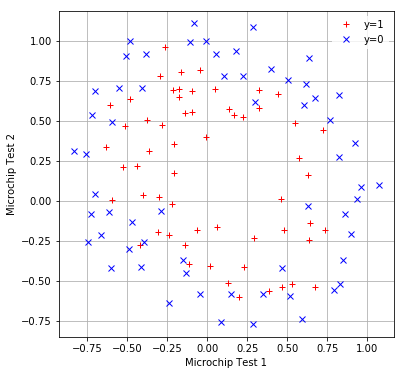

In [3]:
pos = train_Y == 1
neg = train_Y == 0

plt.figure(figsize=(6,6))
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='y=1')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='y=0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')

### Map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power ###

$$
mapFeature(x) = \begin{bmatrix}
                1      \\
                x_1    \\
                x_2    \\
                x_1^2  \\
                x_1x_2 \\
                x_2^2  \\
                x_1^3  \\
                \vdots  \\
                x_1x_2^5\\
                x_2^6
                \end{bmatrix}
$$

In [4]:
def mapFeature(x1, x2):
    order = 6
    y = np.ones([28, x1.size])
    
    line = 0
    for i in xrange(order + 1):
        for j in xrange(i+1):
            y[line] = np.multiply(np.power(x1, j), np.power(x2, i-j))
            line += 1
    return y

print mapFeature(train_X[0], train_X[1]).shape

(28, 118)


### Regularized Cost Function ###
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
$$

In [5]:
temp_X = mapFeature(train_X[0], train_X[1])
temp_Y = train_Y.reshape([n_samples, 1])

def h(X, w):
    return tf.matmul(w, X)

def hypothesis(X, w):
    return tf.sigmoid(h(X, w))

def costF(X, Y, w, lamb=0):
    return -(tf.matmul(tf.log(hypothesis(X, w)), Y) + tf.matmul(tf.log(1-hypothesis(X, w)), 1-Y))\
            / n_samples + tf.matmul(w, w, transpose_b=True) * lamb / (2*n_samples)
    
X = tf.placeholder(tf.float32, name="input")
Y = tf.placeholder(tf.float32, name="output")
W = tf.Variable(tf.zeros([1, 28]), "weight")

reg_lambda = 0
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(costF(X, Y, W, reg_lambda))

init = tf.initialize_all_variables()

In [6]:
sess = tf.Session()

sess.run(init)
for step in xrange(50001):
    feed = {X:temp_X, Y:temp_Y}
    sess.run(train, feed)
    if step % 10000 == 0:
        print step, sess.run(costF(X, Y, W), feed)

0 [[ 0.6927126]]
10000 [[ 0.31050521]]
20000 [[ 0.29508996]]
30000 [[ 0.28848219]]
40000 [[ 0.28454202]]
50000 [[ 0.28180799]]


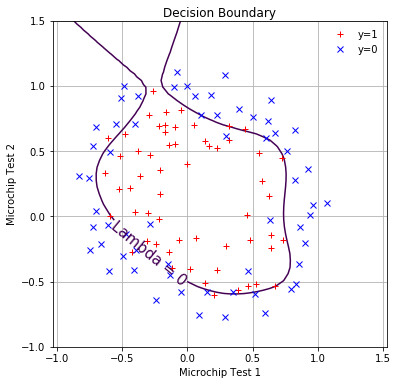

In [7]:
y = sess.run(h(X, W), feed_dict={X:temp_X})

def plotBoundary(w, X, Y, lamb=0.):
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in xrange(len(xvals)):
        for j in xrange(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(w,myfeaturesij)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%lamb}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

plt.figure(figsize=(6,6))
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='y=1')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='y=0')
plotBoundary(sess.run(W), temp_X, y, reg_lambda)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')